# Multiple Linear Regression
Bike sharing Case Study 

Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

To create a linear model that quantitatively relates the demand for shared bikes with the available independent variables.

# The steps I will follow in this case study are as follows:

1.Reading, understanding and visualising the data.

2.preparing the data for modelling(train-test split, rescaling etc.)

3.Training the model

4.Residual analysis

5.Predictions and evaluation on the test set

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
#read the data
day = pd.read_csv("day.csv")

In [7]:
# Check the first 5 rows of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the 'data' dataframe

In [8]:
day.shape

(730, 16)

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [10]:
#gives us a summary of the numerical columns in the dataframe
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking Correlations for all the variables

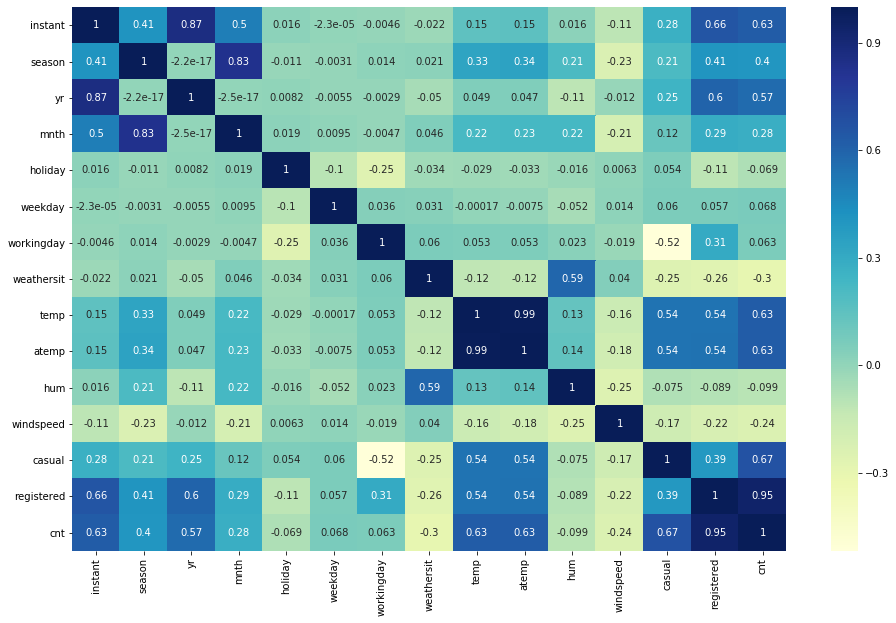

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Visualising Numeric Variables


Let's make a pairplot of all the numeric variables

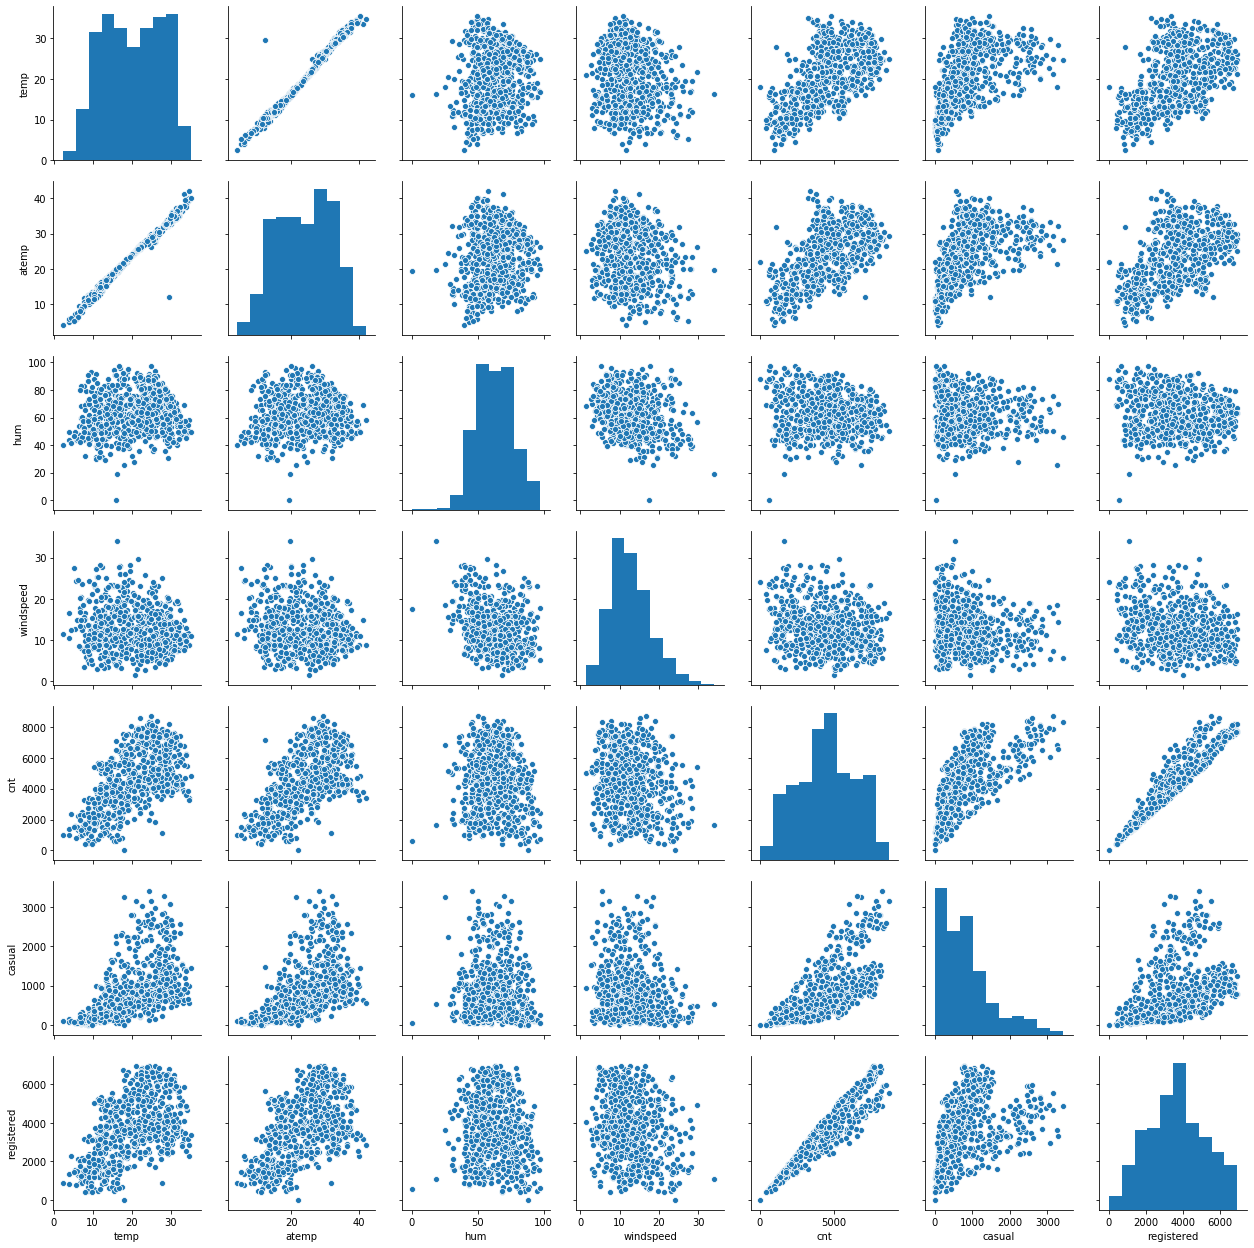

In [13]:
curr=day[['temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered']]
sns.pairplot(curr)
plt.show()

We can see 'temp' and 'atemp' columns are highly correlated with 'cnt'

We can see 'casual' and 'registered' columns are highly correlated with 'cnt'

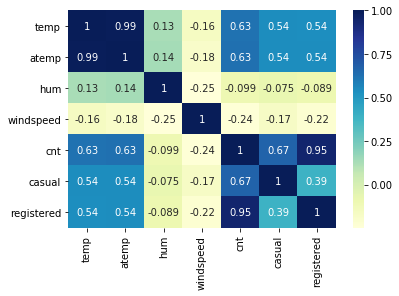

In [14]:
#Correlations for numeric variables
cor=curr.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

# Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

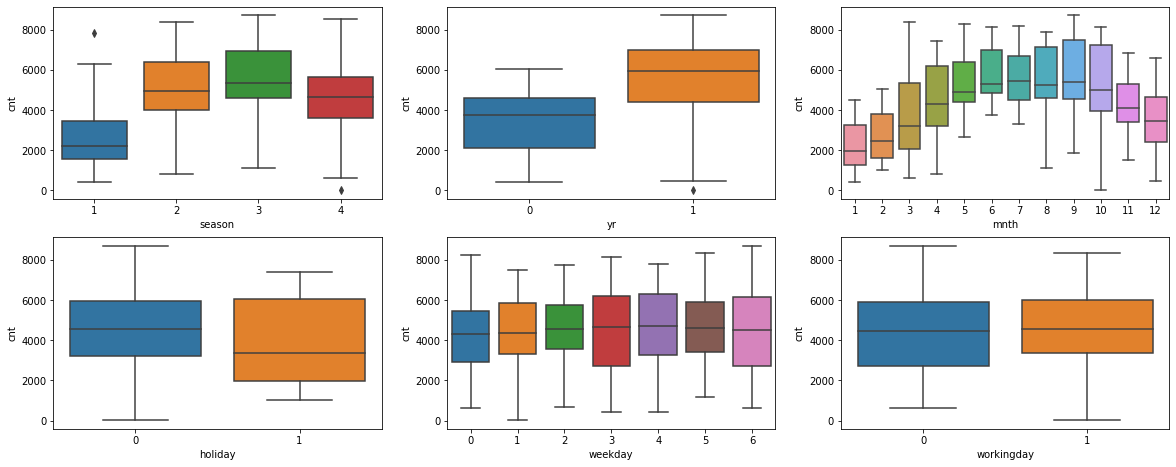

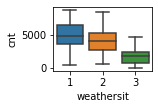

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

Interpretation:-

The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.

The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

The season box plots indicates that more bikes are rent during fall season.

The month box plots indicates that more bikes are rent during september month.

The year box plots indicates that more bikes are rent during 2019.

The weekday box plots indicates that more bikes are rent during wednesday.

# EDA

Dropping columns "instant","dteday","casual","registered".As casual and registered are collinear with eachother.

In [16]:
day=day.drop(['instant','dteday','casual','registered'],axis=1)

In [17]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Preparation

# Changing the data type of categorical variables from int to object

In [18]:
day["season"]= day["season"].astype(str)
day["mnth"]= day["mnth"].astype(str)
day["weekday"]= day["weekday"].astype(str)
day["weathersit"]= day["weathersit"].astype(str)

In [19]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.5+ KB


# Creating dummy variables

# Dummies creation for column "Season"

In [20]:
# List of variables to map
def binary_map(x):
    return x.map({'1':'season_spring','2':'season_summer','3':'season_fall','4':'season_winter'})

day['season'] = day[['season']].apply(binary_map)

In [21]:
day.season.value_counts()

season_fall      188
season_summer    184
season_spring    180
season_winter    178
Name: season, dtype: int64

In [22]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status1'
status1=pd.get_dummies(day['season'],drop_first=True)
status1.head()

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Add the results to the original 'data' dataframe

day=pd.concat([day,status1],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,season_spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,season_spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,season_spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,season_spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,season_spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [24]:
# Drop 'season' as we have created the dummies for it
day=day.drop('season',axis=1)

In [25]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


# Dummies creation for column "mnth"

In [26]:
day.mnth.value_counts()

10    62
7     62
8     62
1     62
12    62
3     62
5     62
11    60
6     60
9     60
4     60
2     56
Name: mnth, dtype: int64

In [27]:
def binary_map(x):
    return x.map({'1':'january','2':'februry','3':'march','4':'april','5':'may','6':'june','7':'july','8':'august','9':'september','10':'october','11':'november','12':'december'})

day['mnth'] = day[['mnth']].apply(binary_map)

In [28]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,0,january,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,january,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,january,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,january,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,january,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [29]:
day.mnth.value_counts()

october      62
december     62
january      62
may          62
march        62
august       62
july         62
september    60
november     60
april        60
june         60
februry      56
Name: mnth, dtype: int64

In [30]:
status2=pd.get_dummies(day['mnth'],drop_first=True)
status2.head()

,august,december,februry,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
day=pd.concat([day,status2],axis=1)
day=day.drop('mnth',axis=1)

In [32]:
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,december,februry,january,july,june,march,may,november,october,september
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [33]:
#no need to create dummies for holiday as it is binary
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

# Dummies creation for column "weekday"

In [34]:
day.weekday.value_counts()

0    105
6    105
1    105
4    104
5    104
2    104
3    103
Name: weekday, dtype: int64

In [35]:
def binary_map(x):
    return x.map({'0':'sunday','1':'monday','2':'tuesday','3':'wednesday','4':'thursday','5':'friday','6':'saturday'})

day['weekday'] = day[['weekday']].apply(binary_map)

In [36]:
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,december,februry,january,july,june,march,may,november,october,september
0,0,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [37]:
status3=pd.get_dummies(day['weekday'],drop_first=True)
status3.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [38]:
day=pd.concat([day,status3],axis=1)
day=day.drop('weekday',axis=1)

In [39]:
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
#no need to create dummies for workingday as it is binary
day.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

# Dummies creation for column "weathersit"

In [41]:
def binary_map(x):
    return x.map({'1':'weathersit_1','2':'weathersit_2','3':'weathersit_3','4':'weathersit_4'})

day['weathersit'] = day[['weathersit']].apply(binary_map)

In [42]:
day.weathersit.value_counts()

weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: weathersit, dtype: int64

In [43]:
status4=pd.get_dummies(day['weathersit'],drop_first=True)
status4.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [44]:
day=pd.concat([day,status4],axis=1)
day=day.drop('weathersit',axis=1)

In [45]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr               730 non-null int64
holiday          730 non-null int64
workingday       730 non-null int64
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
cnt              730 non-null int64
season_spring    730 non-null uint8
season_summer    730 non-null uint8
season_winter    730 non-null uint8
august           730 non-null uint8
december         730 non-null uint8
februry          730 non-null uint8
january          730 non-null uint8
july             730 non-null uint8
june             730 non-null uint8
march            730 non-null uint8
may              730 non-null uint8
november         730 non-null uint8
october          730 non-null uint8
september        730 non-null uint8
monday           730 non-null uint8
saturday         730 non-null uint8
sunday           730 no

In [47]:
#Final data afer creating dummies
day.shape

(730, 30)

# Split data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [48]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(day, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [49]:
#First five rows for train dataframe
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,1,0


In [50]:
#First five rows for test dataframe
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
yr               510 non-null int64
holiday          510 non-null int64
workingday       510 non-null int64
temp             510 non-null float64
atemp            510 non-null float64
hum              510 non-null float64
windspeed        510 non-null float64
cnt              510 non-null int64
season_spring    510 non-null uint8
season_summer    510 non-null uint8
season_winter    510 non-null uint8
august           510 non-null uint8
december         510 non-null uint8
februry          510 non-null uint8
january          510 non-null uint8
july             510 non-null uint8
june             510 non-null uint8
march            510 non-null uint8
may              510 non-null uint8
november         510 non-null uint8
october          510 non-null uint8
september        510 non-null uint8
monday           510 non-null uint8
saturday         510 non-null uint8
sunday           510 

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
yr               220 non-null int64
holiday          220 non-null int64
workingday       220 non-null int64
temp             220 non-null float64
atemp            220 non-null float64
hum              220 non-null float64
windspeed        220 non-null float64
cnt              220 non-null int64
season_spring    220 non-null uint8
season_summer    220 non-null uint8
season_winter    220 non-null uint8
august           220 non-null uint8
december         220 non-null uint8
februry          220 non-null uint8
january          220 non-null uint8
july             220 non-null uint8
june             220 non-null uint8
march            220 non-null uint8
may              220 non-null uint8
november         220 non-null uint8
october          220 non-null uint8
september        220 non-null uint8
monday           220 non-null uint8
saturday         220 non-null uint8
sunday           220 

# Rescaling the features

I have used MinMax scaling.

In [53]:
#importing lirary
from sklearn.preprocessing import MinMaxScaler

In [54]:
#1. Instantiate an object
scaler = MinMaxScaler()

In [55]:
# Apply scaler() to all the columns except the 'dummy' and categorical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# 2. fitting on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


In [57]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


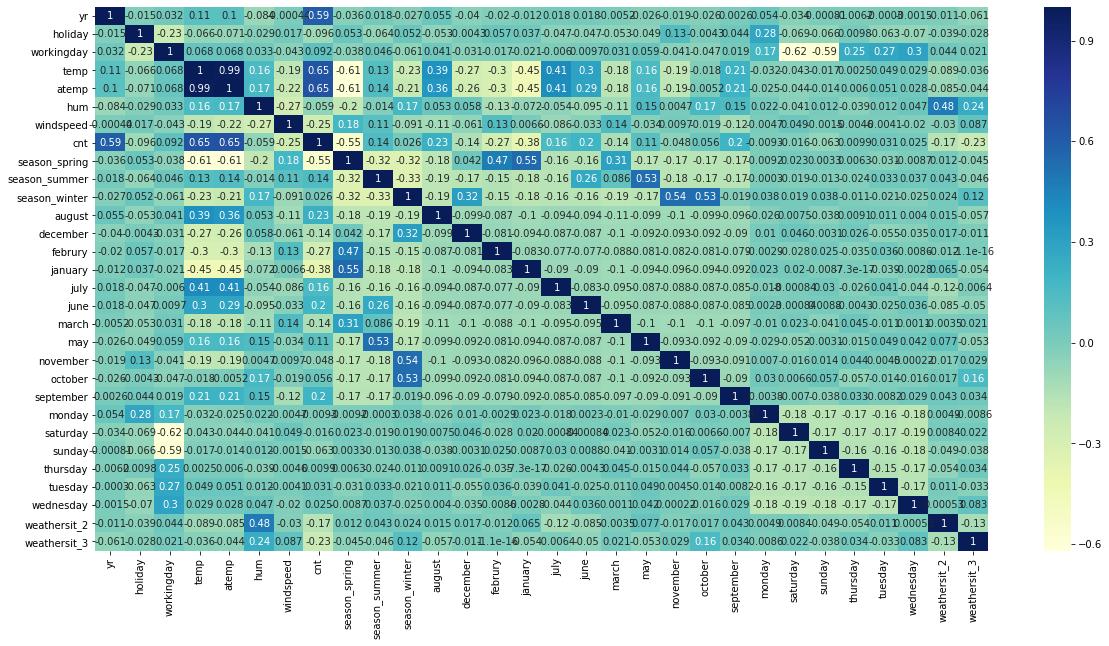

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed yr, temp and atemp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt and atemp vs cnt.

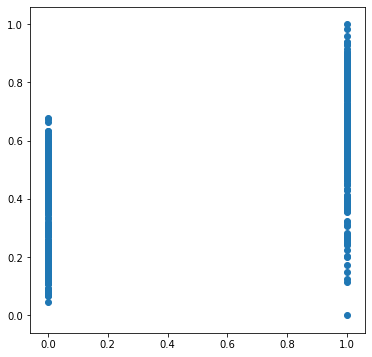

In [59]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.yr, df_train.cnt)
plt.show()

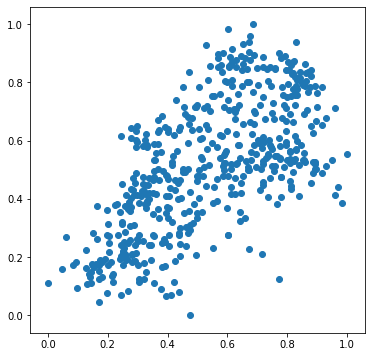

In [60]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

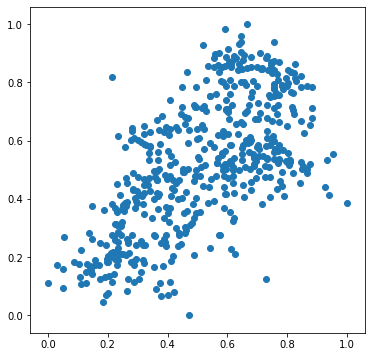

In [61]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

# Dividing into X and Y sets for the model building

In [62]:
y_train = df_train.pop('cnt')
X_train = df_train

In [63]:
#All the columns except 'cnt' column
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
#Only 'cnt' column
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [65]:
#All columns except 'cnt'
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
yr               510 non-null int64
holiday          510 non-null int64
workingday       510 non-null int64
temp             510 non-null float64
atemp            510 non-null float64
hum              510 non-null float64
windspeed        510 non-null float64
season_spring    510 non-null uint8
season_summer    510 non-null uint8
season_winter    510 non-null uint8
august           510 non-null uint8
december         510 non-null uint8
februry          510 non-null uint8
january          510 non-null uint8
july             510 non-null uint8
june             510 non-null uint8
march            510 non-null uint8
may              510 non-null uint8
november         510 non-null uint8
october          510 non-null uint8
september        510 non-null uint8
monday           510 non-null uint8
saturday         510 non-null uint8
sunday           510 non-null uint8
thursday         510 

# Building the Linear model

I have used the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

# RFE
Recursive feature elimination

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('august', False, 7),
 ('december', False, 3),
 ('februry', False, 4),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 6),
 ('november', False, 2),
 ('october', False, 13),
 ('september', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'january', 'july',
       'september', 'saturday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['atemp', 'august', 'december', 'februry', 'june', 'march', 'may',
       'november', 'october', 'monday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
yr               510 non-null int64
holiday          510 non-null int64
workingday       510 non-null int64
temp             510 non-null float64
atemp            510 non-null float64
hum              510 non-null float64
windspeed        510 non-null float64
season_spring    510 non-null uint8
season_summer    510 non-null uint8
season_winter    510 non-null uint8
august           510 non-null uint8
december         510 non-null uint8
februry          510 non-null uint8
january          510 non-null uint8
july             510 non-null uint8
june             510 non-null uint8
march            510 non-null uint8
may              510 non-null uint8
november         510 non-null uint8
october          510 non-null uint8
september        510 non-null uint8
monday           510 non-null uint8
saturday         510 non-null uint8
sunday           510 non-null uint8
thursday         510 

# Building model using statsmodel, for the detailed statistics

# Model 1

In [72]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [74]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [75]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [76]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        14:04:30   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

In [77]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'january', 'july',
       'september', 'saturday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [78]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
13,weathersit_2,2.29
0,yr,2.09
12,saturday,1.98


In [80]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'january', 'july',
       'september', 'saturday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 2

"january" column is insignificant in presence of other variables; can be dropped.

Hence Rebuilding the model without "january"

In [81]:
X_train_new = X_train_rfe.drop(["january"], axis = 1)

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [83]:
lm1 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [84]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.11e-191
Time:                        14:04:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [85]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [86]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
12,weathersit_2,2.29
0,yr,2.08
11,saturday,1.97


In [87]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'july', 'september',
       'saturday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 3

Dropping column 'hum' and rebuilding the model

In [88]:
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new1 = sm.add_constant(X_train_new1)

In [90]:
lm2 = sm.OLS(y_train,X_train_new1).fit()   # Running the linear model

In [91]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.28e-188
Time:                        14:04:32   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

In [92]:
X_train_new1 = X_train_new1.drop(['const'], axis=1)

In [93]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.34
0,yr,2.07
7,season_winter,1.98
10,saturday,1.96
8,july,1.58
11,weathersit_2,1.57


In [94]:
X_train_new1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'july', 'september', 'saturday',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 4

Dropping column 'holiday' and rebuilding the model

In [95]:
X_train_new2 = X_train_new1.drop(["holiday"], axis = 1)

In [96]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new2 = sm.add_constant(X_train_new2)

In [97]:
lm3 = sm.OLS(y_train,X_train_new2).fit()   # Running the linear model

In [98]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.12e-189
Time:                        14:04:33   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [99]:
X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.32
0,yr,2.07
6,season_winter,1.91
9,saturday,1.83
7,july,1.58
10,weathersit_2,1.57


In [101]:
X_train_new2.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'july', 'september', 'saturday',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 5

Dropping column 'workingday' and rebuilding the model

In [102]:
X_train_new3 = X_train_new2.drop(['workingday'], axis=1)

In [103]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new3 = sm.add_constant(X_train_new3)

In [104]:
lm4 = sm.OLS(y_train,X_train_new3).fit()   # Running the linear model

In [105]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.54e-185
Time:                        14:04:33   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1935      0.030      6.468

In [106]:
X_train_new3 = X_train_new3.drop(['const'], axis=1)

In [107]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.08
0,yr,2.07
5,season_winter,1.78
6,july,1.58
9,weathersit_2,1.55
7,september,1.33
8,saturday,1.18


# Model 6

 Dropping column 'saturday' and rebuilding the model

In [108]:
X_train_new4 = X_train_new3.drop(['saturday'], axis=1)

In [109]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new4 = sm.add_constant(X_train_new4)

In [110]:
lm5 = sm.OLS(y_train,X_train_new4).fit()   # Running the linear model

In [111]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.00e-185
Time:                        14:04:34   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1974      0.030      6.593

In [112]:
X_train_new4 = X_train_new4.drop(['const'], axis=1)

In [113]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,season_summer,2.23
0,yr,2.07
3,season_spring,2.07
5,season_winter,1.77
6,july,1.58
8,weathersit_2,1.55
7,september,1.33
9,weathersit_3,1.08


In [114]:
X_train_new4.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'july', 'september', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 7

Dropping column 'windspeed' and rebuilding the model

In [115]:
X_train_new5 = X_train_new4.drop(['windspeed'], axis=1)

In [116]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new5 = sm.add_constant(X_train_new5)

In [117]:
lm6 = sm.OLS(y_train,X_train_new5).fit()   # Running the linear model

In [118]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.15e-179
Time:                        14:04:35   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1474      0.030      4.971

In [119]:
X_train_new5 = X_train_new5.drop(['const'], axis=1)

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.21
0,yr,2.06
3,season_summer,1.94
5,july,1.58
4,season_winter,1.56
7,weathersit_2,1.55
2,season_spring,1.38
6,september,1.33
8,weathersit_3,1.06


In [121]:
X_train_new5.columns

Index(['yr', 'temp', 'season_spring', 'season_summer', 'season_winter', 'july',
       'september', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [122]:
X_train_new5.shape

(510, 9)

In [123]:
X_train_new5 = sm.add_constant(X_train_new5)

In [124]:
y_train_cnt = lm6.predict(X_train_new5)

In [125]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

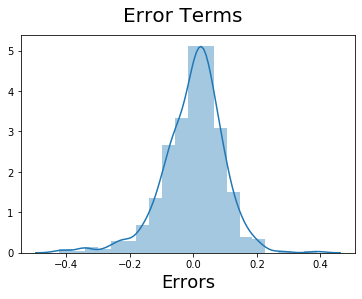

In [126]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

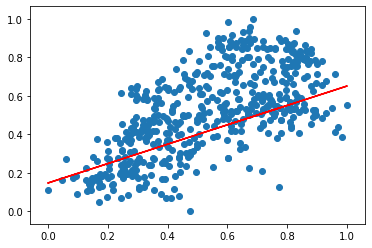

In [127]:
# Visualise the 'temp' data with a scatter plot and the fitted regression line 
plt.scatter(X_train_new5.iloc[:,2],y_train)
plt.plot(X_train_new5.iloc[:,2],0.147+0.504*X_train_new5.iloc[:,2],'r')
plt.show()

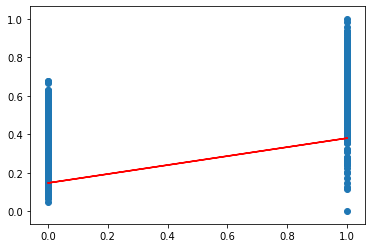

In [128]:
# Visualise the 'yr' data with a scatter plot and the fitted regression line 
plt.scatter(X_train_new5.iloc[:,1],y_train)
plt.plot(X_train_new5.iloc[:,1],0.147+0.2330*X_train_new5.iloc[:,1],'r')
plt.show()

# Making Predictions using Final Model

#### Applying the scaling on the test sets

In [129]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [130]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X_test and y_test

In [131]:
y_test = df_test.pop('cnt')
X_test = df_test

In [132]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [133]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [134]:
X_train_new5.columns

Index(['const', 'yr', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'july', 'september', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [135]:
X_train_new5 = X_train_new5.drop(['const'], axis=1)

In [136]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

In [137]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [138]:
X_test_new.head()

,const,yr,temp,season_spring,season_summer,season_winter,july,september,weathersit_2,weathersit_3
184,1.0,0,0.831783,0,0,0,1,0,1,0
535,1.0,1,0.901354,0,1,0,0,0,0,0
299,1.0,0,0.511964,0,0,1,0,0,1,0
221,1.0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0.817246,0,1,0,0,0,0,0


In [139]:
# Making predictions
y_test_pred = lm6.predict(X_test_new)

In [140]:
y_test_pred.head()

184    0.438754
535    0.871633
299    0.409006
221    0.591782
152    0.596270
dtype: float64

In [141]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test ,y_pred=y_test_pred)

0.8082117653777106

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

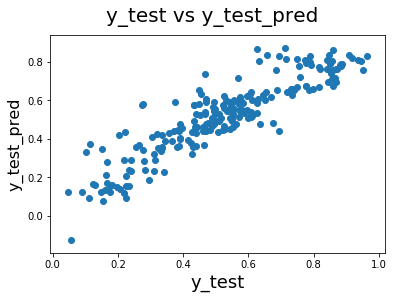

In [142]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ cnt = 0.1474 + 0.2330 \times  yr  +  0.5040 \times  temp -  0.0792 \times  season_spring +  0.0369 \times season_summer + 0.0802 \times season_winter - 0.0512 \times july + 0.0776 \times september - 0.0767 \times weathersit_2  - 0.2948 \times weathersit_3 $